**QUESTION 8**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(Y_in):
    return 1 / (1 + np.exp(-Y_in))

In [3]:
def find_Yhat(X, w, b):
    # IF LIST OF LIST / LIST OF TUPLE IS USED, THEN INDIVIDUAL LIST/TUPLE SHOULD BE HANDLED DIFFERENTLY
    if type(X) in [type([1]), type((1,2))]:
        Y_in = np.dot(X, w) + b
    else:
        Y_in = X * w + b

    return sigmoid(Y_in)

In [4]:
def delta_w(X, Y_true, Y_pred):
  return -2 * (Y_true - Y_pred) * Y_pred * (1 - Y_pred) * X

In [5]:
def delta_b(Y_true, Y_pred):
  return -2 * (Y_true - Y_pred) * Y_pred * (1 - Y_pred)

In [6]:
X = [0.5, 2.5]
Y = [0.2, 0.9]

In [7]:
n_epochs = 300
df = pd.DataFrame([(x, y) for x, y in zip(X, Y)], columns = ['X', 'Y'])
df.head()

,X,Y
0,0.5,0.2
1,2.5,0.9


Stochastic gradient


In [26]:
def stochastic_gradient_descent(X, Y, noofepochs = 300):
    w = -2; alpha = 1; b = -2;

    # LIST FOR ALL EPOCHS
    error_mega_list = []
    weights_mega_list = []
    bias_mega_list = []
        
    for i in range(noofepochs):
        # LIST FOR EACH EPOCH
        error_list = []

        for x, y in zip(X, Y):
            Y_hat = find_Yhat(x, w, b)
            error_list.append((y - Y_hat) ** 2)

            dw = delta_w(x, y, Y_hat)
            db = delta_b(y, Y_hat)
        
            w += (-alpha * dw)
            b += (-alpha * db)
        
        error_mega_list.append(error_list)
        weights_mega_list.append(w)
        bias_mega_list.append(b)
        
    return error_mega_list, weights_mega_list, bias_mega_list

In [27]:
errors_sgd, weights_sgd, biases_sgd = stochastic_gradient_descent(X, Y, n_epochs)

In [28]:
print(round(np.mean(errors_sgd[-1]),5))
print(round(weights_sgd[-1],3))
print(round(biases_sgd[-1],3))

0.0
1.79
-2.279


In [38]:
print(errors_sgd)

[[0.023278864175627943, 0.8083093769617619], [0.022987094143524414, 0.8082340561957188], [0.02268611693340322, 0.8081536400482038], [0.022375528524336243, 0.8080676600598286], [0.02205490257310974, 0.8079755923986867], [0.021723788906194138, 0.8078768497228687], [0.021381711882247235, 0.8077707715905619], [0.021028168609743544, 0.8076566131086201], [0.020662627001743792, 0.8075335314332391], [0.02028452364670592, 0.8074005696367634], [0.019893261470477146, 0.8072566373252278], [0.019488207160062655, 0.8071004872218214], [0.019068688314289, 0.8069306867078133], [0.01863399027990998, 0.8067455830146659], [0.01818335262388677, 0.8065432603607926], [0.017715965183407602, 0.8063214867830678], [0.017230963624706577, 0.8060776476677775], [0.016727424430166185, 0.805808661951424], [0.016204359221324058, 0.8055108755091565], [0.01566070831501708, 0.8051799241815354], [0.015095333404603617, 0.8048105559072054], [0.014507009265091977, 0.8043963970577048], [0.013894414413632296, 0.8039296415582279

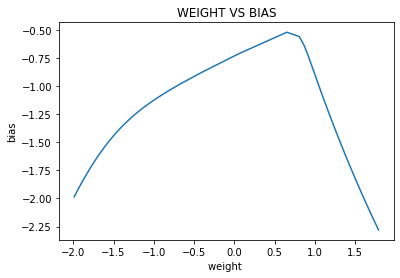

In [41]:
plt.title("WEIGHT VS BIAS")
epoch_range = [i for i in weights_sgd]
weight_range = [w for w in biases_sgd]
plt.plot(epoch_range, weight_range)
plt.xlabel('weight ')
plt.ylabel('bias')
plt.show()

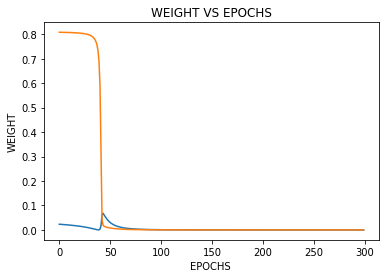

In [40]:
plt.title("WEIGHT VS EPOCHS")
epoch_range = [i for i in range(n_epochs)]
weight_range = [w for w in errors_sgd]
plt.plot(epoch_range, weight_range)
plt.xlabel('EPOCHS ')
plt.ylabel('WEIGHT')
plt.show()

Batch gradient descent


In [45]:
def batch_gradient_descent(X, Y, noofepochs = 300):
    w = -2; alpha = 1; b = -2;
    dw, db = 0, 0

    # LIST FOR ALL EPOCHS
    error_mega_list = []
    weights_mega_list = []
    bias_mega_list = []
        
    for i in range(noofepochs):
        # LIST FOR EACH EPOCH
        error_list = []

        for x, y in zip(X, Y):
            Y_hat = find_Yhat(x, w, b)
            error_list.append((y - Y_hat) ** 2)

            dw += delta_w(x, y, Y_hat)
            db += delta_b(y, Y_hat)
        
        w += (-alpha * dw / len(X))
        b += (-alpha * db / len(X))
        
        dw, db = 0, 0
        
        error_mega_list.append(error_list)
        weights_mega_list.append(w)
        bias_mega_list.append(b)
       
       
        
        
    return error_mega_list, weights_mega_list, bias_mega_list

In [46]:
errors_bgd, weights_bgd, biases_bgd = batch_gradient_descent(X, Y, n_epochs)

In [47]:
print(round(np.mean(errors_bgd[-1]),5))
print(round(weights_bgd[-1],3))
print(round(biases_bgd[-1],3))

6e-05
1.733
-2.198


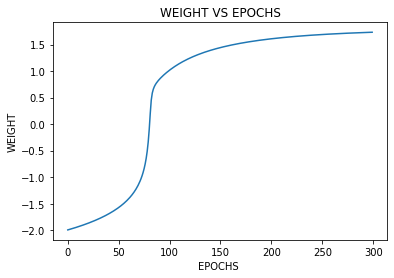

In [48]:
plt.title("WEIGHT VS EPOCHS")
epoch_range = [i for i in range(n_epochs)]
weight_range = [w for w in weights_bgd]
plt.plot(epoch_range, weight_range)
plt.xlabel('EPOCHS ')
plt.ylabel('WEIGHT')
plt.show()

In [49]:
epoch_range = [i for i in range(0, n_epochs + 1)]

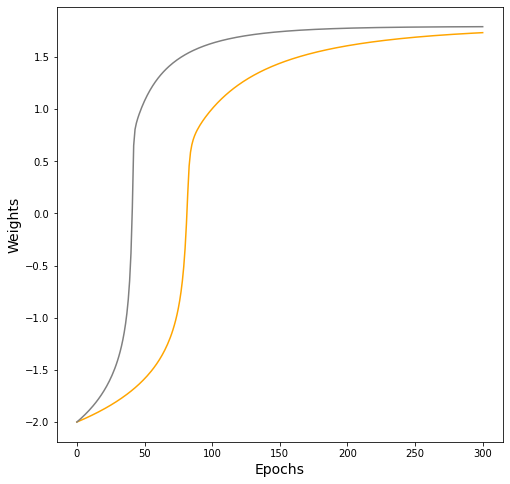

In [50]:
plt.figure(figsize = (8, 8))
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Weights", fontsize = 14)
plt.plot(epoch_range, [-2, *weights_bgd], color = 'orange')
plt.plot(epoch_range, [-2, *weights_sgd], color = 'grey')
plt.show()

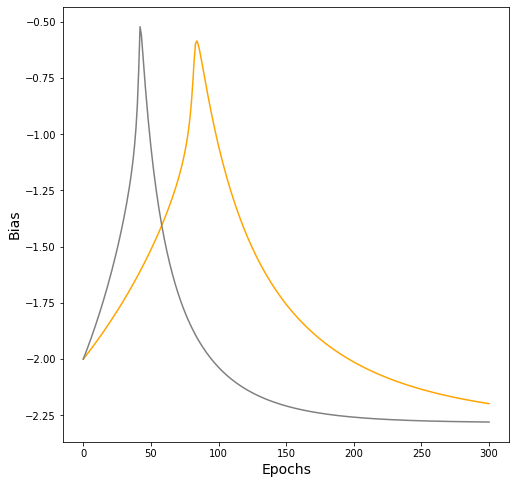

In [51]:
plt.figure(figsize = (8, 8))
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Bias", fontsize = 14)
plt.plot(epoch_range, [-2, *biases_bgd], color = 'orange')
plt.plot(epoch_range, [-2, *biases_sgd], color = 'grey')
plt.show()

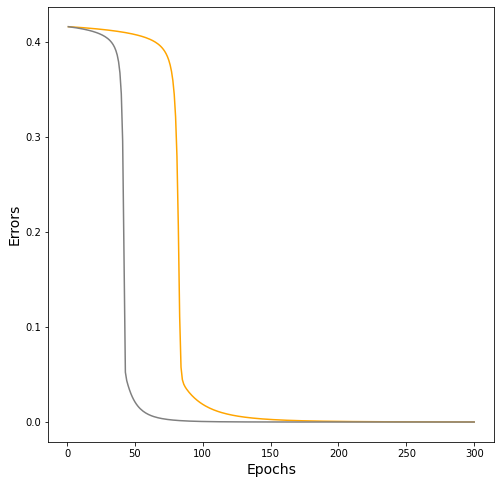

In [37]:
epoch_range = [i for i in range(1, n_epochs+1)]
plt.figure(figsize = (8, 8))
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Errors", fontsize = 14)
plt.plot(epoch_range, [np.mean(i) for i in errors_bgd], color = 'orange')
plt.plot(epoch_range, [np.mean(i) for i in errors_sgd], color = 'grey')
plt.show()